In [1]:
# Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

import seaborn as sns

In [2]:
# Cargando el archivo y agregando el nombre a cada columna
df = pd.DataFrame(np.load("proyecto_training_data.npy")\
                  ,columns = ['sale_price','overallquial','stfloor_square','room','year_built','lot_frontage'])

In [ ]:
# Verificando el tipo de cada columna
df.info()

In [3]:
# explorando los datos que LotFrontage: Linear feet of street connected to property tienen datos vacíos
# se procedio a colocar la media aritmetica
df['lot_frontage'] = df['lot_frontage'].fillna( df['lot_frontage'].mean() )
df['lot_frontage'] = df['lot_frontage'].astype(int)
df['year_built'] = df['year_built'].astype(int)
df["valor1"] = 1
                                               

### **Separando los datos 80% entrenamiento y 20% prueba**

In [4]:
X = df.iloc[:,1:].values # seleccionando las variables independientes
y = df.iloc[:,:1].values # seleccionando la variable dependiente


In [5]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba
X_entrenamiento, x_prueba, y_entrenamiento, y_pruebo = train_test_split(X,y, test_size= 0.2 , random_state = 0 )

In [6]:
# obteniendo la media, desviación estandar, valor minimo y máximo, el primer, segundo y tercer cuartil
df_entrenamiento = (pd.DataFrame(X_entrenamiento)).rename(columns= {0:'overallquial',1:'stfloor_square',2:'room',3:'year_built',4:'lot_frontage' })
print(df_entrenamiento.describe())

       overallquial  stfloor_square         room   year_built  lot_frontage  \
count   1168.000000     1168.000000  1168.000000  1168.000000   1168.000000   
mean       6.086473     1160.958904     6.544521  1970.890411     69.684075   
std        1.367472      373.315037     1.624493    30.407486     20.758010   
min        1.000000      334.000000     2.000000  1872.000000     21.000000   
25%        5.000000      884.000000     5.000000  1953.750000     60.000000   
50%        6.000000     1092.000000     6.000000  1972.000000     70.000000   
75%        7.000000     1389.250000     7.000000  2000.000000     79.000000   
max       10.000000     3228.000000    14.000000  2010.000000    313.000000   

            5  
count  1168.0  
mean      1.0  
std       0.0  
min       1.0  
25%       1.0  
50%       1.0  
75%       1.0  
max       1.0  


In [ ]:
# Rango
print(df_entrenamiento.max(axis= 0) - df_entrenamiento.min(axis= 0))

In [ ]:
sns.set_style("darkgrid")
hist1 = sns.histplot(data= df_entrenamiento , x="overallquial",binwidth = 1)
hist1.set_title("Overall material and finish quality")
hist1.set(ylabel="Cantidad")
plt.show()

In [ ]:
sns.set_style("darkgrid")
hist2 = sns.histplot(data= df_entrenamiento , x="stfloor_square")
hist2.set_title("First Floor square feet")
hist2.set(ylabel="Cantidad")
plt.show()

In [ ]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="room", binwidth= 1)
hist3.set_title("Total rooms above grade (does not include bathrooms)")
hist3.set(ylabel="Cantidad")
plt.show()

In [ ]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="year_built")
hist3.set_title("Original construction date")
hist3.set(ylabel="Cantidad")
plt.show()


sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="lot_frontage")
hist3.set_title("Linear feet of street connected to property")
hist3.set(ylabel="Cantidad")
plt.show()


### Regresión lineal

${y = \beta_0 + \beta_1 X}  $

### Coeficiente de correlacion


$\hat{\beta}= (X'X)^{-1} X'Y$

In [ ]:
a = np.linalg.inv(np.dot(X_entrenamiento.T,X_entrenamiento))
b = np.dot(X_entrenamiento.T, y_entrenamiento[:,0] )
#np.dot(a,b)


In [ ]:

def coeficiente_correlacion(matriz_y, matriz_x):
    """ Función que genera el coeficiente de correlación entre las variables en estudio """
    lista = ['overallquial','stfloor_square','room','year_built','lot_frontage']
    coeficiente = []
    for i in range(0,len(matriz_x[0])-1):
        coef = np.corrcoef(matriz_y[:,0],matriz_x[:,i])
        a = ("Correlación entre sales_price y "+ str(lista[i])+" "+ str(round ((coef[0][1]),3) ))
        coeficiente.append(str(a))
    return coeficiente
    


In [ ]:
# Coeficiente de correlación
coeficiente_correlacion(y_entrenamiento,X_entrenamiento)

##### Gráfica de dispersión

In [ ]:
def scatter(variable_x, coeficiente=0):
    """ Función que realiza el gráfico de dispersión  """
    plt.scatter(x = df_entrenamiento[[variable_x]], y= pd.DataFrame(y_entrenamiento),color = 'red')
    plt.title("sales price and"+" "+variable_x+" / "+ "coef. correlación ="+coeficiente_correlacion(y_entrenamiento,X_entrenamiento)[coeficiente][-5:]   )
    plt.xlabel(variable_x)
    plt.ylabel("Sales price")
    return plt.show()

In [ ]:
scatter('overallquial') 

In [ ]:
scatter('stfloor_square',1)

In [ ]:
scatter('room',2)

In [ ]:
scatter('year_built',3)

In [ ]:
scatter('lot_frontage',4)


In [33]:
def calcular_modelo(w,b,x):
    '''Retorna el valor w*x+b correspondiente al modelo lineal'''
    return w*x+b

In [34]:
def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error
    

In [35]:
def gradiente_descendente(w_, b_, alpha, x, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "w" y "b"
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    w = w_ - alpha*dw
    b = b_ - alpha*db

    return w, b

In [36]:

x = X_entrenamiento[:,0]
y = y_entrenamiento[:,0]

In [37]:
np.random.seed(2)
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

In [38]:
alpha = 0.0004
nits = 40000

In [42]:
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w,b,alpha,x,y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w,b,x)

    # Actualizar el valor del error
    error[i] = calcular_error(y,y_)

    # Imprimir resultados cada 1000 epochs
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

Epoch 1000
    w: 42017.1  b: -73918.6
    error: [2.33043771e+09]
Epoch 2000
    w: 42141.1  b: -74710.4
    error: [2.32883177e+09]
Epoch 3000
    w: 42260.5  b: -75473.1
    error: [2.32734184e+09]
Epoch 4000
    w: 42375.6  b: -76207.7
    error: [2.32595956e+09]
Epoch 5000
    w: 42486.4  b: -76915.2
    error: [2.32467714e+09]
Epoch 6000
    w: 42593.1  b: -77596.7
    error: [2.32348736e+09]
Epoch 7000
    w: 42695.9  b: -78253.2
    error: [2.32238354e+09]
Epoch 8000
    w: 42794.9  b: -78885.5
    error: [2.32135946e+09]
Epoch 9000
    w: 42890.3  b: -79494.5
    error: [2.32040937e+09]
Epoch 10000
    w: 42982.1  b: -80081.1
    error: [2.31952791e+09]
Epoch 11000
    w: 43070.6  b: -80646.1
    error: [2.31871014e+09]
Epoch 12000
    w: 43155.8  b: -81190.3
    error: [2.31795144e+09]
Epoch 13000
    w: 43237.9  b: -81714.5
    error: [2.31724756e+09]
Epoch 14000
    w: 43317.0  b: -82219.5
    error: [2.31659452e+09]
Epoch 15000
    w: 43393.2  b: -82705.8
    error: [2.315

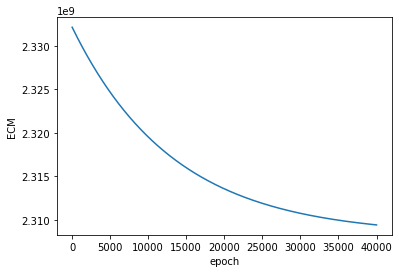

In [51]:
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

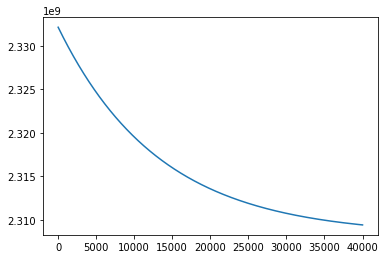

In [62]:
plt.plot(error)

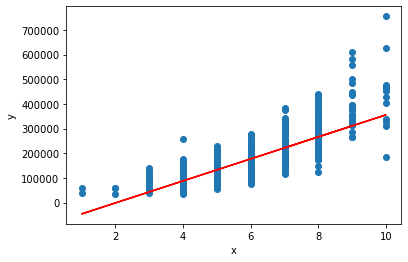

In [54]:
y_regr = calcular_modelo(w,b,x)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
X = X_entrenamiento[:,0]
Y = y_entrenamiento[:,0].reshape(X.size, 1)
X = np.vstack((np.ones((X.size, )), X)).T

In [17]:
print(X.shape)
print(Y.shape)

(1168, 2)
(1168, 1)


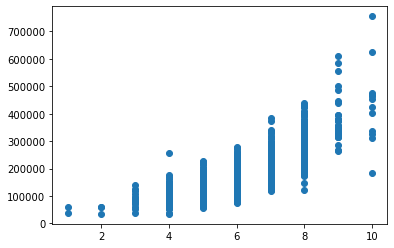

In [18]:
plt.scatter(X[:, 1], Y)
plt.show()

In [44]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((2, 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
    return theta, cost_list

In [52]:
iteration = 40000
learning_rate = 0.0004
theta, cost_list = model(X, Y, learning_rate = learning_rate,
iteration = iteration)

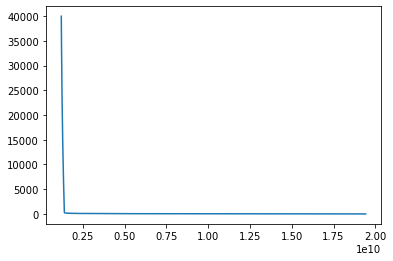

In [53]:
rng = np.arange(0, iteration)
plt.plot(cost_list, rng)
plt.show()

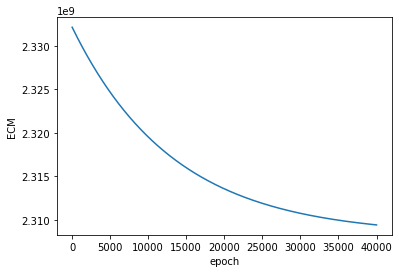

In [69]:
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

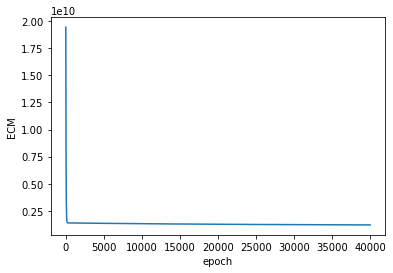

In [103]:
plt.plot(range(iteration),np.array(cost_list).reshape(len(cost_list),1) )
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()